In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Load data

In [2]:
# read the train data
data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [3]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Exploratory data analysis

Check for missing or NA values

In [4]:
# check for the null values
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Check for data types of the attributes. If there are categorical attributes, convert them using one hot encoding.

In [5]:
print(data.dtypes)

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [6]:
statistics = data.agg(['min', 'max'])

for col in data.columns:
    if data[col].dtype.type is np.object_:
        continue

    if statistics[col].max() > 1.0:
        print("Column Name: {}, Min: {}, Max: {}".format(col, statistics[col].min(), statistics[col].max()))

Column Name: Area, Min: 20420, Max: 254616
Column Name: Perimeter, Min: 524.736, Max: 1985.37
Column Name: MajorAxisLength, Min: 183.601165, Max: 738.8601535
Column Name: MinorAxisLength, Min: 122.5126535, Max: 460.1984968
Column Name: AspectRation, Min: 1.024867596, Max: 2.430306447
Column Name: ConvexArea, Min: 20684, Max: 263261
Column Name: EquivDiameter, Min: 161.2437642, Max: 569.3743583


Look at the unique output classes. There are 7 unique output classes. The distribution of the classes are not equal.

In [7]:
print(data['Class'].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [8]:
print(data.groupby('Class').size())

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64


Convert the output classes into integer representation using ordinal encoding.

In [9]:
bean_class_dict = {'SEKER' : 1, 'BARBUNYA': 2, 'BOMBAY': 3, 'CALI': 4, 'HOROZ': 5, 'SIRA': 6, 'DERMASON': 7}
data['Class_y'] = data['Class'].map(bean_class_dict)

data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,1
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,1
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,1


Observe if the attributes exhibit Gaussian Distribution and the correlations across the attributes.

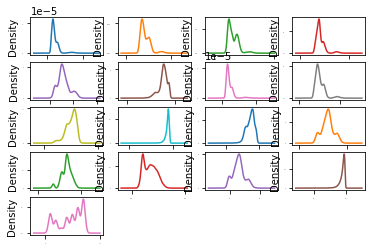

In [10]:
data.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=False, fontsize=1)
plt.show()

## Baseline model training

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

Identify the best performing classifier model using the data set without pre-processing. Split the data into train-test set in ration of 80:20. 

In [13]:
# separate the independent and target variable 
train_X = data.drop(columns=['Class','Class_y'])
train_Y = data['Class_y']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.20, random_state=21)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((10888, 16), (2723, 16), (10888,), (2723,))

Identify the best performing model from the list of 6 classifier models from SKLEARN, using KFOLD cross validation.

In [14]:
ensembles = []
ensembles.append(('ADABOOST', AdaBoostClassifier()))
ensembles.append(('BAGGING', BaggingClassifier()))
ensembles.append(('GRADIENT', GradientBoostingClassifier()))
ensembles.append(('RANDOMFOREST', RandomForestClassifier()))
ensembles.append(('EXTRATREE', ExtraTreesClassifier()))

import warnings

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, model in ensembles:
        kfold = KFold(n_splits=10, shuffle=True, random_state=21)
        start = time.time()
        cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "{}: MEAN ACC {:.4f} STD: {:.4f} RUN_TIME: {:.3f}".format(name, cv_results.mean(), cv_results.std(), end-start))

ADABOOST: MEAN ACC 0.6250 STD: 0.0234 RUN_TIME: 9.982
BAGGING: MEAN ACC 0.9204 STD: 0.0071 RUN_TIME: 9.007
GRADIENT: MEAN ACC 0.9253 STD: 0.0061 RUN_TIME: 291.808
RANDOMFOREST: MEAN ACC 0.9216 STD: 0.0055 RUN_TIME: 23.605
EXTRATREE: MEAN ACC 0.9193 STD: 0.0050 RUN_TIME: 5.424


I picked RANDOMFOREST even though it's mean accuracy is second compared to GRADIENTBOOSTINGCLASSIFIER. This is because the training speed for RANDOMFOREST is 10 times faster compared to GRADIENTBOOSTINGCLASSIFIER for a small trade-off in mean accuracy. Next, we have to find the best value of the estimator.

In [ ]:
param_grid = dict(n_estimators=np.array([50,100,200,300,400,500]))
model = RandomForestClassifier(random_state=21)
kfold = KFold(n_splits=10, shuffle=True, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
start = time.time()
grid_result = grid.fit(train_x, train_y)
end = time.time()

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("MSE: {:.4f} STD: {:.4f} with: {}".format(mean, stdev, param))

print("Best: {:.4f} using {} (run time : {:.4f})".format(grid_result.best_score_, grid_result.best_params_, end-start))

In [ ]:
model = RandomForestClassifier(random_state=21, n_estimators=50)
model.fit(train_x, train_y)
print("Model training completed")

## Baseline model evaluation

The baseline model accuracy on the test data is around 92.2%

In [ ]:
predict_test = model.predict(test_x)
print("Accuracy score {:.4f}".format(accuracy_score(test_y, predict_test)))
print(classification_report(test_y, predict_test))

In [ ]:
print(confusion_matrix(test_y, predict_test))

## Handling Outliers

We can see a few cases of outliers from the dataset using box plots. One example is the outlier values of AREA, grouped by the classes.

In [ ]:
data.boxplot(column=['Area'], by=['Class'], figsize=(12, 8))

Group the data according to the output classes and identify the outliers for 'Area' attribute by calculating the z_score. We drop the rows where the z_score > 3 or z_score < -3. Then we retrain the model and see if the output accuracy improves.

In [ ]:
from scipy import stats

classes = data['Class'].unique()
update_data = pd.DataFrame()

for cat in classes:
    data_x = data[data["Class"] == cat]
    area_z_scores = np.abs(stats.zscore(data_x['Area']))
    aspect_z_scores = np.abs(stats.zscore(data_x['AspectRation']))
    eccen_z_scores = np.abs(stats.zscore(data_x['Eccentricity']))
    
    data_x = data_x.drop(data_x.loc[(area_z_scores > 3) | (area_z_scores < -3)].index)
    data_x = data_x.drop(data_x.loc[(aspect_z_scores > 3) | (aspect_z_scores < -3)].index)
    data_x = data_x.drop(data_x.loc[(eccen_z_scores > 3) | (eccen_z_scores < -3)].index)

    update_data = pd.concat([update_data, data_x], axis=0)

update_data.head(10)

Observe the boxplot if there are any more outliers.

In [ ]:
update_data.boxplot(column=['Area'], by=['Class'], figsize=(12, 8))

## Model Retraining using data with outliers removed

The data out is trimed of outliers based on the Z-scores of attributes Area, AspectRation and Eccentricity when grouped by output classes

In [ ]:
# separate the independent and target variable 
train_X = update_data.drop(columns=['Class','Class_y'])
train_Y = update_data['Class_y']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.20, random_state=21)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

In [ ]:
model = RandomForestClassifier(random_state=21, n_estimators=50)
model.fit(train_x, train_y)
print("Model training completed")

The accuracy of the model trained with the trimmed data set has improved to 93.4%.

In [ ]:
predict_test = model.predict(test_x)
print("Accuracy score {:.4f}".format(accuracy_score(test_y, predict_test)))
print(classification_report(test_y, predict_test))

In [ ]:
print(confusion_matrix(test_y, predict_test))